# Assignment 6
## Atharva Sripaad Galphade U25922351
### Dataset used and Problem Statement:

Description of Data:
Each feature in this dataset describes characteristics of the cell nuclei that are found in mentioned digitalized images.
Dataset is composed of 569 examples which include 357 benign and 212 malignant instances. There are three types of features in this dataset, of which real-valued features are most interesting. They are calculated from digitalized images and contain information about the area, the radius of the cell, texture, etc.

What do I plan to do with data:
I am going to use the data to predict the diagnosis on breast cancer type. This will be a classification problem. 

Information on Data provenance:
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

The dataset has real values.

#### Problem Statement:

The goal of this project is to develop a predictive model for classifying breast cancer cases into one of two categories: benign or malignant. Our objective is to leverage the information contained in these features to create a machine learning model that can accurately and reliably predict the type of breast cancer (benign or malignant) based on the cell nuclei characteristics. The classification problem involves using the dataset to train and evaluate different machine learning algorithms like Decision Tree Classifier, Support Vector Classification and logistic Regression and hypertuning the parameters using randomized and grid search to determine which one can provide the highest accuracy in diagnosing breast cancer.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
bc_df = pd.read_csv('./data/wdbc.csv')
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Check column names if they are standard for all columns 

In [94]:
bc_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

As all column names are small cased and the spaces are already replaced with underscore. We don't need to change the column names.

Check the shape of dataset as in observations and columns.

In [95]:
bc_df.shape

(569, 33)

Check the unique values in target variable.

In [96]:
bc_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Perform the value counts for the target variable to get the idea of the dataset.

In [97]:
bc_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Check if the null values are present in dataset or not.

In [98]:
bc_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Check the datatypes of the variables.

In [99]:
bc_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Change the value of diagnosis to integer 0 and 1 which will help for classification.

In [100]:
bc_df_Dummy = pd.get_dummies(
    bc_df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['diagnosis'], 
    dtype='int32'
)
bc_df_Dummy

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


Confirm the value counts 0 for benign(B) and 1 for malignant(M)

In [101]:
bc_df_Dummy['diagnosis_M'].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

Check the co-relation of the target variable with other columns, so that we can drop the columns that do not have any co-relation.

In [102]:
corr = bc_df_Dummy.corr()['diagnosis_M'].abs()
print(corr.sort_values(ascending=False))

diagnosis_M                1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

Plotting the graph to visualize the co-relation.

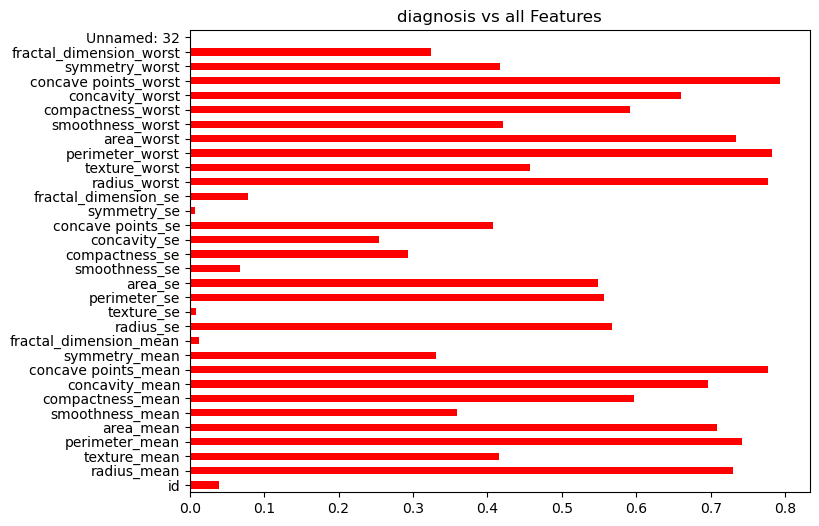

In [103]:
bc_df_Dummy.drop('diagnosis_M', axis=1).corrwith(bc_df_Dummy.diagnosis_M).abs().plot(kind='barh',
                                                           figsize=(8, 6),
                                                           color='red',
                                                           title="diagnosis vs all Features")
plt.show()

We know that the ID will not help in prediction. From graph we can say that Unnamed: 32 has 0 co-relation with diagnosis.Drop the columns which will not help in the prediction.

In [104]:
bc_df_Dummy = bc_df_Dummy.drop(columns=['id', 'Unnamed: 32'])

Converting the dataframe to .csv format so that we can use them for model fitting and prediction purpose.

In [105]:
bc_df_Dummy.to_csv('./data/Preprocessed_data.csv')